## 선형회귀

### k-최근접 이웃의 한계

In [28]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [29]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눈다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42
    )

# 훈련 세트와 테스트 세트를 2차원 배열로 바꾸기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [31]:
# 길이가 50인 농어 무게 예측
print(knr.predict([[50]]))

[1033.33333333]


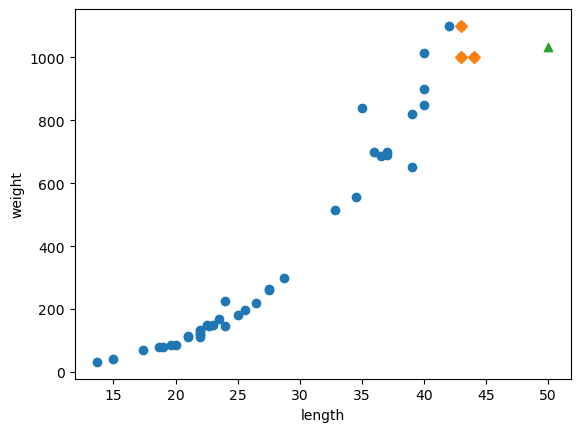

In [32]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker = '^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [33]:
# 샘플들의 무게 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


In [34]:
# 길이가 100cm인 농어도 1033g으로 예측함
print(knr.predict([[100]]))

[1033.33333333]


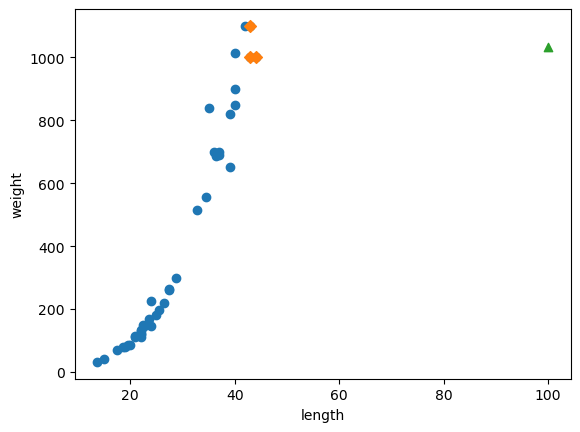

In [35]:
# 100cm 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker = '^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

** 머신러닝 모델은 주기적으로 훈련해야 함
- 시간과 환경이 변화하면서 데이터도 바뀌기 떄문에 주기적으로 새로운 훈련 데이터로 모델을 다시 훈련해야 함

### 선형 회귀

선형회귀(liner regression)
- 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘

- 널리 사용되는 대표적인 회귀 알고리즘
- 비교적 간단하고 성능이 뛰어남

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형회귀 모델 훈련하기
lr.fit(train_input, train_target)

# 50cm 농어 예측하기
print(lr.predict([[50]]))

[1241.83860323]


In [37]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535474


coef_속성 이름에서 알 수 있듯이 머신러닝에서 기울기를 종종 계수(coefficient) 또는 가중치(weight)라고 부름

모델 파리미터(model parameter)
- coef_와 intercept_를 머신러닝 알고리즘이 찾은 값

- 머신러닝 알고리즘의 훈련 과정 -> 최적의 모델 파라미터를 찾는 것 => 모델 기반 학습

- k-최근접 이웃에는 모델 파라미터x -> 훈련 세트를 저장하는 것이 훈련의 전부 => 사례 기반 학습

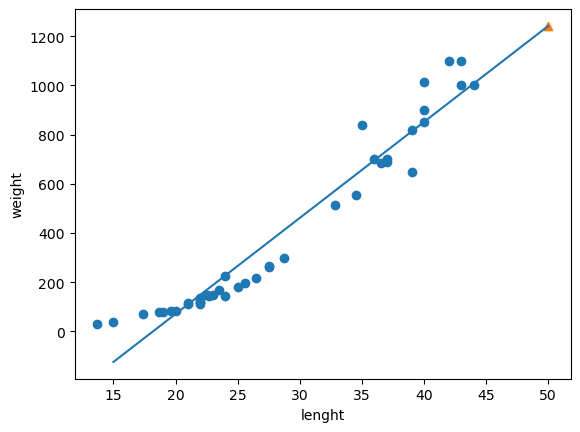

In [38]:
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

In [39]:
# R^2 점수 확인
print(lr.score(train_input, train_target)) # 훈련 세트
print(lr.score(test_input, test_target)) # 테스트 세트

0.9398463339976041
0.824750312331356


### 다항회귀
다항회귀(polynomial regression)
- 다항식을 사용한 선형 회귀

In [40]:
# column_stack() 함수 사용
# train_input을 제곱한 것과 train_input 두 배열을 나란히 붙이기
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [41]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [42]:
# train_poly를 사용해 선형 회귀 모델 다시 훈련하기
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50 ** 2, 50]]))

[1573.98423528]


In [43]:
# 모델이 훈련한 계수와 절편 출력하기
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278338


무게 = 1.01 * 길이^2 - 21.6 * 길이 + 116.05

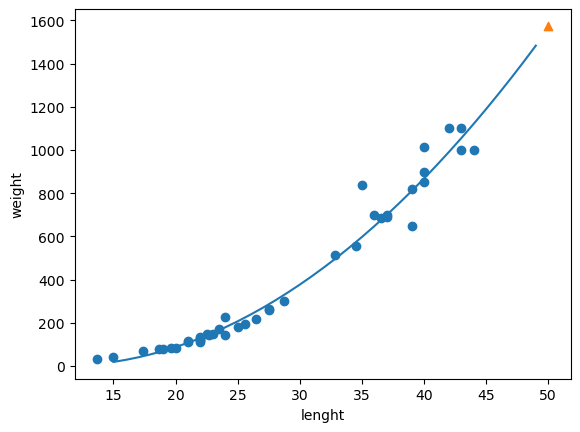

In [45]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 만들기
point = np.arange(15, 50)

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, 1.01 * point ** 2 - 21.6 * point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker = '^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

In [46]:
# 훈련 세트와 테스트 세트 R^2 점수 평가
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
